# Ejemplo Aprendizaje Supervisado

Bedane, Tarikwa Tesfa (2020), “Road Traffic Accident Dataset of Addis Ababa City”, Mendeley Data, V1, doi: 10.17632/xytv86278f.1

https://data.mendeley.com/datasets/xytv86278f/1

In [1]:
# Librerias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Datos
datos = pd.read_csv('cleaned.csv')

In [3]:
datos.shape

(12316, 15)

In [4]:
datos.describe(include="all")

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316.000000
unique,5,3,7,4,8,7,8,6,4,9,10,13,9,20,NaN
top,18-30,Male,Junior high school,Employee,5-10yr,Two-way (divided with broken lines road marking),Y Shape,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,No distancing,NaN
freq,4271,11437,7619,9627,3363,4411,4543,11296,8798,10063,8774,8158,11390,2263,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.832819
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.406082
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age_band_of_driver       12316 non-null  object
 1   Sex_of_driver            12316 non-null  object
 2   Educational_level        12316 non-null  object
 3   Vehicle_driver_relation  12316 non-null  object
 4   Driving_experience       12316 non-null  object
 5   Lanes_or_Medians         12316 non-null  object
 6   Types_of_Junction        12316 non-null  object
 7   Road_surface_type        12316 non-null  object
 8   Light_conditions         12316 non-null  object
 9   Weather_conditions       12316 non-null  object
 10  Type_of_collision        12316 non-null  object
 11  Vehicle_movement         12316 non-null  object
 12  Pedestrian_movement      12316 non-null  object
 13  Cause_of_accident        12316 non-null  object
 14  Accident_severity        12316 non-nul

In [6]:
datos.isna().sum()

Age_band_of_driver         0
Sex_of_driver              0
Educational_level          0
Vehicle_driver_relation    0
Driving_experience         0
Lanes_or_Medians           0
Types_of_Junction          0
Road_surface_type          0
Light_conditions           0
Weather_conditions         0
Type_of_collision          0
Vehicle_movement           0
Pedestrian_movement        0
Cause_of_accident          0
Accident_severity          0
dtype: int64

In [7]:
datos['Age_band_of_driver'].value_counts()

18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: Age_band_of_driver, dtype: int64

In [8]:
datos['Educational_level'].value_counts()

Junior high school    7619
Elementary school     2163
High school           1110
Unknown                841
Above high school      362
Writing & reading      176
Illiterate              45
Name: Educational_level, dtype: int64

In [9]:
datos['Road_surface_type'].value_counts()

Asphalt roads                       11296
Earth roads                           358
Gravel roads                          242
Unknown                               172
Other                                 167
Asphalt roads with some distress       81
Name: Road_surface_type, dtype: int64

In [10]:
datos['Weather_conditions'].value_counts()

Normal               10063
Raining               1331
Other                  296
Unknown                292
Cloudy                 125
Windy                   98
Snow                    61
Raining and Windy       40
Fog or mist             10
Name: Weather_conditions, dtype: int64

In [11]:
datos['Cause_of_accident'].value_counts()

No distancing                           2263
Changing lane to the right              1808
Changing lane to the left               1473
Driving carelessly                      1402
No priority to vehicle                  1207
Moving Backward                         1137
No priority to pedestrian                721
Other                                    456
Overtaking                               430
Driving under the influence of drugs     340
Driving to the left                      284
Getting off the vehicle improperly       197
Driving at high speed                    174
Overturning                              149
Turnover                                  78
Overspeed                                 61
Overloading                               59
Drunk driving                             27
Unknown                                   25
Improper parking                          25
Name: Cause_of_accident, dtype: int64

In [12]:
datos['Accident_severity'].value_counts()

2    10415
1     1743
0      158
Name: Accident_severity, dtype: int64

# Preprocesamiento - Ingeniería de atributos

In [24]:
datos.columns

Index(['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [25]:
# One-hot encoding
datos_aux = pd.get_dummies(datos[['Age_band_of_driver', 'Sex_of_driver', 'Educational_level','Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians','Types_of_Junction', 'Road_surface_type', 'Light_conditions','Weather_conditions', 'Type_of_collision', 'Vehicle_movement','Pedestrian_movement', 'Cause_of_accident']])

In [26]:
[datos.shape, datos_aux.shape]

[(12316, 15), (12316, 113)]

In [27]:
datos_aux.head()

,Age_band_of_driver_18-30,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Sex_of_driver_Female,Sex_of_driver_Male,Sex_of_driver_Unknown,Educational_level_Above high school,Educational_level_Elementary school,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [28]:
# Target
Y = datos['Accident_severity']

In [29]:
Y.shape

(12316,)

In [30]:
# Datos entrenamiento y prueba
np.random.seed(123)
x_train, x_test, y_train, y_test = train_test_split(datos_aux, Y, test_size=0.20)

In [32]:
[x_train.shape, y_train.shape, x_test.shape, y_test.shape]

[(9852, 113), (9852,), (2464, 113), (2464,)]

# Implementación de modelos de aprendizaje supervisado

In [33]:
# Regresión logística
from sklearn.linear_model import LogisticRegression

In [35]:
modelo_RL = LogisticRegression(max_iter=10000).fit(x_train,y_train)

In [36]:
y_RL = modelo_RL.predict(x_test)

In [37]:
# Reporte de clasification
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [38]:
print(classification_report(y_test,y_RL))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.00      0.00      0.00       337
           2       0.85      1.00      0.92      2097

    accuracy                           0.85      2464
   macro avg       0.28      0.33      0.31      2464
weighted avg       0.72      0.85      0.78      2464



/Users/ivan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ivan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ivan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Matriz de Confusión - RL')

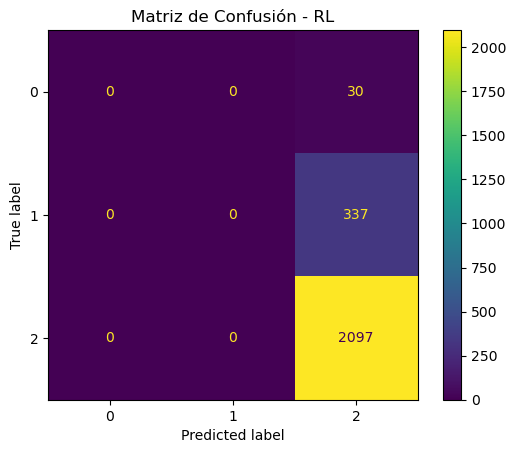

In [39]:
CM_RL = confusion_matrix(y_test,y_RL)
CM_RL_d = ConfusionMatrixDisplay(CM_RL)
CM_RL_d.plot()
CM_RL_d.ax_.set_title("Matriz de Confusión - RL")

# Balanceo de Clases

In [40]:
# pip install imblearn
# Oversampling
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

In [41]:
xo, yo = oversample.fit_resample(datos_aux,Y)

In [42]:
[datos_aux.shape, Y.shape, xo.shape, yo.shape]

[(12316, 113), (12316,), (31245, 113), (31245,)]

In [43]:
yo.value_counts()

2    10415
1    10415
0    10415
Name: Accident_severity, dtype: int64

In [44]:
# Nuevos conjuntos de entrenamiento y prueba
x_train2, x_test2, y_train2, y_test2 = train_test_split(xo,yo,test_size=0.20)

In [45]:
[x_train2.shape, y_train2.shape, x_test2.shape, y_test2.shape]

[(24996, 113), (24996,), (6249, 113), (6249,)]

# Regresión Logística con Oversampling

In [46]:
modelo_RL2 = LogisticRegression(max_iter=10000).fit(x_train2,y_train2)

In [47]:
y_RL2 = modelo_RL2.predict(x_test2)

In [48]:
# Reporte de clasficación
print(classification_report(y_test2,y_RL2))

              precision    recall  f1-score   support

           0       0.72      0.65      0.68      2102
           1       0.63      0.57      0.60      2092
           2       0.84      1.00      0.91      2055

    accuracy                           0.74      6249
   macro avg       0.73      0.74      0.73      6249
weighted avg       0.73      0.74      0.73      6249



Text(0.5, 1.0, 'Matriz - RL 2')

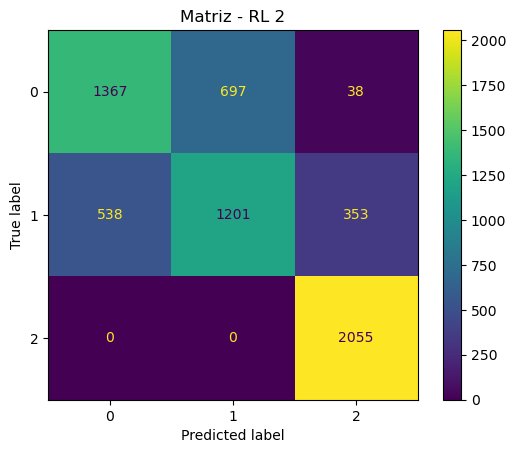

In [49]:
CM_RL2 = confusion_matrix(y_test2, y_RL2)
CM_RL_d2 = ConfusionMatrixDisplay(CM_RL2)
CM_RL_d2.plot()
CM_RL_d2.ax_.set_title("Matriz - RL 2")

In [50]:
# Undersampling
from imblearn.under_sampling import RandomUnderSampler

us = RandomUnderSampler(replacement = True)


In [51]:
xu, yu = us.fit_resample(datos_aux,Y)

In [52]:
[xu.shape, yu.shape]

[(474, 113), (474,)]

In [53]:
[datos_aux.shape, Y.shape]

[(12316, 113), (12316,)]

In [54]:
yu.value_counts()

0    158
1    158
2    158
Name: Accident_severity, dtype: int64

In [55]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(xu,yu,test_size=0.20)

In [57]:
[x_train3.shape, y_train3.shape, x_test3.shape, y_test3.shape]

[(379, 113), (379,), (95, 113), (95,)]

In [58]:
y_train3.value_counts()

0    127
1    126
2    126
Name: Accident_severity, dtype: int64

In [59]:
y_test3.value_counts()

2    32
1    32
0    31
Name: Accident_severity, dtype: int64

In [60]:
# Modelo RL
modelo_RL3 = LogisticRegression(max_iter=10000).fit(x_train3,y_train3)

In [61]:
y_RL3 = modelo_RL3.predict(x_test3)
print(classification_report(y_test3, y_RL3))

              precision    recall  f1-score   support

           0       0.48      0.45      0.47        31
           1       0.42      0.34      0.38        32
           2       0.38      0.47      0.42        32

    accuracy                           0.42        95
   macro avg       0.43      0.42      0.42        95
weighted avg       0.43      0.42      0.42        95



# Implementación de otros modelos
## K-vecinos más cercanos
## Árbol de decisión
## Red Neuronal Artificial

In [62]:
# Librerias
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier

In [63]:
# K-vecinos
n_neighbors = 5
modelo_KNN = KNeighborsClassifier(n_neighbors)
modelo_KNN.fit(x_train2,y_train2)

KNeighborsClassifier()

In [64]:
y_KNN = modelo_KNN.predict(x_test2)
print(classification_report(y_test2, y_KNN))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2102
           1       0.90      0.67      0.77      2092
           2       0.83      0.97      0.89      2055

    accuracy                           0.86      6249
   macro avg       0.86      0.86      0.85      6249
weighted avg       0.86      0.86      0.85      6249



Text(0.5, 1.0, 'Matriz - KNN - K = 5')

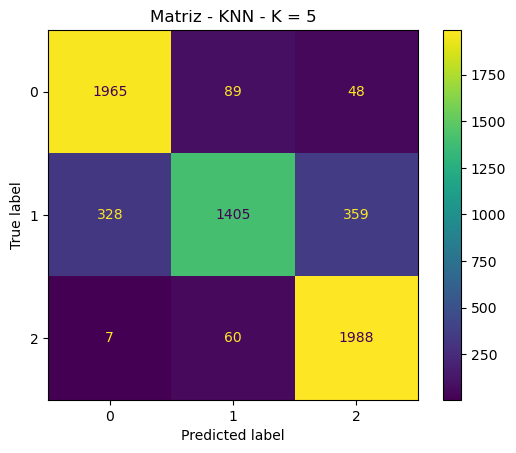

In [65]:
CM_KNN = confusion_matrix(y_test2, y_KNN)
CM_KNN_d = ConfusionMatrixDisplay(CM_KNN)
CM_KNN_d.plot()
CM_KNN_d.ax_.set_title("Matriz - KNN - K = 5")

In [66]:
# Árbol de decisión
modelo_DT = tree.DecisionTreeClassifier(criterion='entropy')
modelo_DT.fit(x_train2, y_train2)

DecisionTreeClassifier(criterion='entropy')

In [69]:
y_DT = modelo_DT.predict(x_test2)
print(classification_report(y_test2, y_DT))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2102
           1       0.82      0.83      0.82      2092
           2       0.85      0.82      0.84      2055

    accuracy                           0.87      6249
   macro avg       0.87      0.87      0.87      6249
weighted avg       0.87      0.87      0.87      6249



Text(0.5, 1.0, 'Matriz - DT - Entropy')

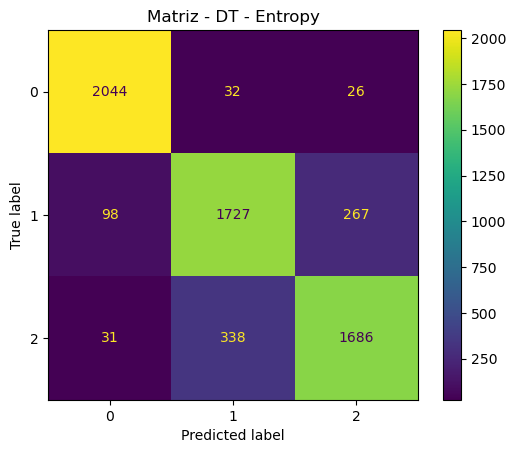

In [71]:
CM_DT = confusion_matrix(y_test2, y_DT)
CM_DT_d = ConfusionMatrixDisplay(CM_DT)
CM_DT_d.plot()
CM_DT_d.ax_.set_title("Matriz - DT - Entropy")

In [72]:
# ANN
modelo_ANN = MLPClassifier(
    hidden_layer_sizes = (10,5),
    activation = 'relu',
    learning_rate_init=0.001,
    max_iter = 1000,
    solver = 'sgd'
)

In [73]:
modelo_ANN.fit(x_train2, y_train2)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, solver='sgd')

In [75]:
y_ANN = modelo_ANN.predict(x_test2)
print(classification_report(y_test2, y_ANN))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      2102
           1       0.85      0.57      0.68      2092
           2       0.83      1.00      0.91      2055

    accuracy                           0.82      6249
   macro avg       0.82      0.82      0.81      6249
weighted avg       0.82      0.82      0.81      6249



Text(0.5, 1.0, 'Matriz - ANN')

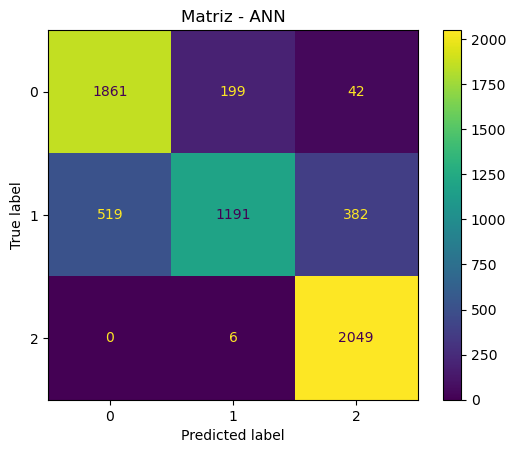

In [76]:
CM_ANN = confusion_matrix(y_test2, y_ANN)
CM_ANN_d = ConfusionMatrixDisplay(CM_ANN)
CM_ANN_d.plot()
CM_ANN_d.ax_.set_title("Matriz - ANN")

# Ajuste de hyperparametros

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
param_DT ={
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2,4,8],
    'min_samples_leaf': [2, 3, 4]
    
}

In [79]:
ajuste_DT = GridSearchCV(estimator=modelo_DT, param_grid=param_DT, cv=5)

In [80]:
ajuste_DT.fit(x_train2, y_train2)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 4, 8]})

In [81]:
params_mejor_DT = ajuste_DT.best_params_
mejor_modelo_DT = ajuste_DT.best_estimator_
mejor_score_DT  = mejor_modelo_DT.score(x_test2, y_test2)

In [82]:
[params_mejor_DT, mejor_modelo_DT, mejor_score_DT]

[{'criterion': 'gini',
  'max_depth': None,
  'min_samples_leaf': 4,
  'min_samples_split': 8},
 DecisionTreeClassifier(min_samples_leaf=4, min_samples_split=8),
 0.881581052968475]

In [83]:
y_mejor_DT = mejor_modelo_DT.predict(x_test2)
print(classification_report(y_test2, y_mejor_DT))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2102
           1       0.85      0.81      0.83      2092
           2       0.85      0.87      0.86      2055

    accuracy                           0.88      6249
   macro avg       0.88      0.88      0.88      6249
weighted avg       0.88      0.88      0.88      6249



Text(0.5, 1.0, 'Matriz - Mejor DT')

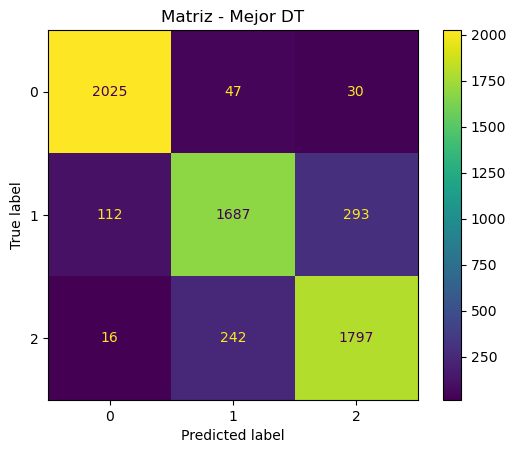

In [84]:
CM_mejor_DT = confusion_matrix(y_test2, y_mejor_DT)
CM_mejor_DT_d = ConfusionMatrixDisplay(CM_mejor_DT)
CM_mejor_DT_d.plot()
CM_mejor_DT_d.ax_.set_title("Matriz - Mejor DT")